In [1]:
import pandas as pd
from database_handler import execute_query,create_connection,return_data_as_df
from lookups import InputTypes

db_session = create_connection()
query = """ SELECT * FROM dw_reporting.dim_gdp_all_measures
 """

df = return_data_as_df(query,InputTypes.SQL,db_session)
df

c:\Users\user\OneDrive\Documents\SE_Factory\FSD\Final_Project\usa_recession_analysis\database_handler.py:64: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return_dataframe = pd.read_sql_query(con= db_session, sql= file_executor)


,date,gdp,pce,gpdi,netexp,gcec,impgs
0,2007-01-01,16611.690,28716.4,2664.295,-739.273,3299.115,2317.264
1,2007-04-01,16713.314,29036.2,2699.217,-745.806,3329.139,2368.569
2,2007-07-01,16809.587,29395.1,2685.969,-728.954,3344.222,2414.664
3,2007-10-01,16915.191,29811.4,2642.560,-729.699,3370.950,2480.413
4,2008-01-01,16843.003,30013.4,2563.701,-771.248,3378.654,2584.568
...,...,...,...,...,...,...,...
61,2022-04-01,21708.160,52245.3,4739.049,-1025.567,3641.161,4069.839
62,2022-07-01,21851.134,53052.6,4724.621,-892.026,3666.982,3976.524
63,2022-10-01,21989.981,53751.2,4796.162,-877.204,3714.800,3891.004
64,2023-01-01,22112.329,54808.7,4725.828,-825.687,3758.768,3890.491


Mean Absolute Error: 211.63014261927128
Mean Squared Error: 86598.5145402375
Root Mean Squared Error: 294.2762554815415


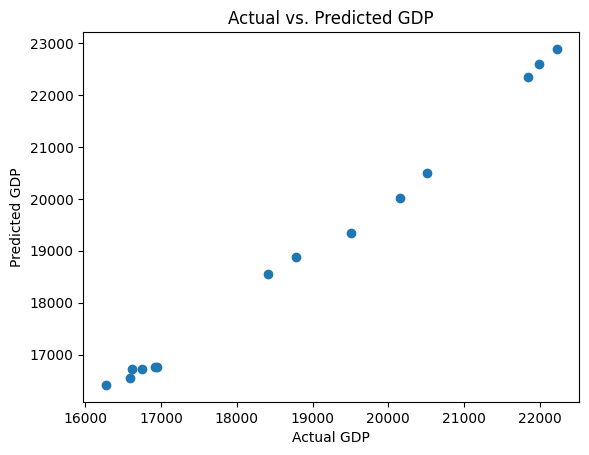

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
# Assuming your data is in a DataFrame named df
# If not, you can create a DataFrame from your data

# Selecting independent variables (features) and dependent variable (target)
X = df[['pce', 'gpdi', 'netexp', 'gcec', 'impgs']]
y = df['gdp']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Visualizing the results (optional)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")
plt.title("Actual vs. Predicted GDP")
plt.show()


In [6]:


# Extract year and quarter for future predictions
future_dates = ["2023-07-01", "2023-10-01", "2024-01-01", "2024-04-01", "2024-07-01", "2024-10-01"]
future_dates = pd.to_datetime(future_dates)

# Extract features and target variable
X = df[['date']]
y = df['gdp']



In [14]:
df['NumericDate'] = (df['date'] - pd.to_datetime('1970-01-01')).dt.total_seconds()


TypeError: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'

In [9]:

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X.values.reshape(-1, 1), y)



TypeError: float() argument must be a string or a real number, not 'datetime.date'

In [ ]:


# Make predictions for future dates
future_dates_features = pd.to_numeric((future_dates - pd.to_datetime('1970-01-01')).dt.days) / (24 * 60 * 60 * 1e9)
future_predictions = model.predict(future_dates_features.values.reshape(-1, 1))

# Display the predictions
future_predictions_df = pd.DataFrame({"Date": future_dates, "Predicted_GDP": future_predictions})
print(future_predictions_df)
